![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Authors:** Kyle Dufrane, Brian Matsiko, Ryan Reilly
***

## Overview

This project analyzes movie data from IMDB, The Numbers, and Box Office Mojo websites.The IMDB dataset includes data of over 38,000 movies. The Numbers includes budget and revenue data of over 5,000 movies and the Box Office Mojo Studio revenue data of over 3,000 movies. Descriptive analysis of movie data shows.....

Microsoft can use this analysis to chose which move to make...

## Business Problem

Microsoft is looking to develop an internal film department and needs clarity on how to be the most successful in the movie industry. Microsoft has never created a movie before. Choosing the first movie to make in this department is critical to their success in the movie industry. 


## Data Understanding

IMDB is the most popular dataset about mvoie information. Each row in this dataset represents a unique movie and surrounding information about the movie. The Numbers dataset includes each unique movie along with budget and revenue numbers. The Box Office Mojo dataset has a dataset that includes unique domestic and forign revenue for each movie. The data analysis will show when the best time to release the data is, top personel to pick for a movie. 

In [72]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [73]:
# Import data

budgets = pd.read_csv('data/zippeddata/tn.movie_budgets.csv')
#movies = pd.read_csv('data/zippeddata/tmdb.movies.csv')
#movie_info = pd.read_csv('data/zippeddata/rt.movie_info.tsv', sep ='\t')
#reviews = pd.read_csv('data/zippeddata/rt.reviews.tsv', sep ='\t', encoding = 'cp1252')

gross_df  = pd.read_csv('data/zippedData/bom.movie_gross.csv')
#names_df  = pd.read_csv('data/zippedData/imdb.name.basics.csv')
#akas_df   = pd.read_csv('.data/zippedData/imdb.title.akas.csv')

name_basics = pd.read_csv('data/zippedData/imdb.name.basics.csv')
title_akas = pd.read_csv('data/zippedData/imdb.title.akas.csv')
title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv')
title_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv')
title_principals = pd.read_csv('data/zippedData/imdb.title.principals.csv')
title_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv')

In [74]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [75]:
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [76]:
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [77]:
title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [78]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [79]:
title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [80]:
title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [81]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


## Budget Data

In [82]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [83]:
#Checking for NAs
budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [84]:
#Checking for duplicates
budgets.duplicated().sum()

0

In [85]:
#Change date column to DateTime
budgets['release_date'] = pd.to_datetime(budgets['release_date'])

#Change money columns to int
budgets['production_budget'] = budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
budgets['domestic_gross'] = budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [86]:
budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


## Studio Data

In [87]:
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [88]:
#Checking for NAs
gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [89]:
#Checking for duplicates
gross_df.duplicated().sum()

0

In [90]:
#Replacing the comma values in "foreign-gross"
gross_df['foreign_gross'].replace(',','', regex=True, inplace=True)

In [91]:
#Convert foreign-gross to float
gross_df["foreign_gross"]= gross_df['foreign_gross'].astype(float)

## IMDB Data

### View top 5 rows

In [92]:
name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [93]:
title_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [94]:
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [95]:
title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [96]:
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [97]:
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### Check for NAs

In [98]:
name_basics.isna().sum()

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

In [99]:
title_akas.isna().sum()

title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [100]:
title_basics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [101]:
title_crew.isna().sum()

tconst           0
directors     5727
writers      35883
dtype: int64

In [102]:
title_principals.isna().sum()

tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

In [103]:
title_ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

### Check for Duplicates

In [104]:
name_basics.duplicated().sum()

0

In [105]:
title_akas.duplicated().sum()

0

In [106]:
title_basics.duplicated().sum()

0

In [107]:
title_crew.duplicated().sum()

0

In [108]:
title_principals.duplicated().sum()

0

In [109]:
title_ratings.duplicated().sum()

0

# Data Preparation

## Data Cleaning

In [110]:
# Removing deceases column in name_basics
name_basics = name_basics[(name_basics['death_year'].isna())]

In [111]:
# Create a column to merge on in name_basics
name_basics['directors'] = name_basics['nconst']
name_basics['writers'] = name_basics['nconst']

In [112]:
# Renaming first column in titles_akas to match merge
title_akas.rename(columns = {'title_id':'tconst'},inplace=True)

In [113]:
# Replacing the runtime_minutes with the mean of the column since we're only missing 20% of our data in title_basics
title_basics['runtime_minutes'].fillna(title_basics['runtime_minutes'].mean(), inplace=True)

## Merging IMDB Tables

In [114]:
# Merge name_basics and title_principals
name_principals = pd.merge(name_basics, title_principals, on='nconst')

In [115]:
# Merge name_principals with title_ratings
name_principals_ratings = pd.merge(name_principals, title_ratings, on='tconst')

In [116]:
# Merge title_crew to name_principals
name_principals_ratings_crew = pd.merge(title_crew, name_principals_ratings, on='tconst')

In [117]:
# Merge titles_basics to name_principals
name_principals_ratings_crew_basics = pd.merge(title_basics, name_principals_ratings_crew, on='tconst')

In [118]:
# Final merge using title_akas and name_principals_ratings_crew_basics
final_merge = pd.merge(title_akas, name_principals_ratings_crew_basics, on='tconst')

In [119]:
# Clean up the final_merge table
final_merge.drop('ordering_y', 1, inplace=True)
final_merge.drop('writers_y', 1, inplace=True)
final_merge.drop('directors_y', 1, inplace=True)

## Feature Engineering

In [120]:
# Add a profit column to Budgets
budgets['profit'] = budgets['worldwide_gross'] - budgets['production_budget']

In [121]:
# Add year, month, month_num, day, day_of_week and day_of_week num columns to Budgets
budgets['year'] = budgets['release_date'].dt.year
budgets['month'] = budgets['release_date'].dt.month_name()
budgets['month_num'] = budgets['release_date'].dt.month
budgets['day'] = budgets['release_date'].dt.day
budgets['day_of_week'] = budgets['release_date'].dt.day_name()
budgets['day_of_week_num'] = budgets['release_date'].dt.dayofweek

In [122]:
# Add a Total Gross column to Studios
gross_df['Total Gross Revenue']=gross_df['domestic_gross'] + gross_df['foreign_gross']

# Analysis

## Profit

In [123]:
# Set the style of the graphs
mpl.style.use('fivethirtyeight')

The below charts show average profit by year over the last 30 years along with average profit by month.

Text(0, 0.5, 'Average Profit (in Billions)')

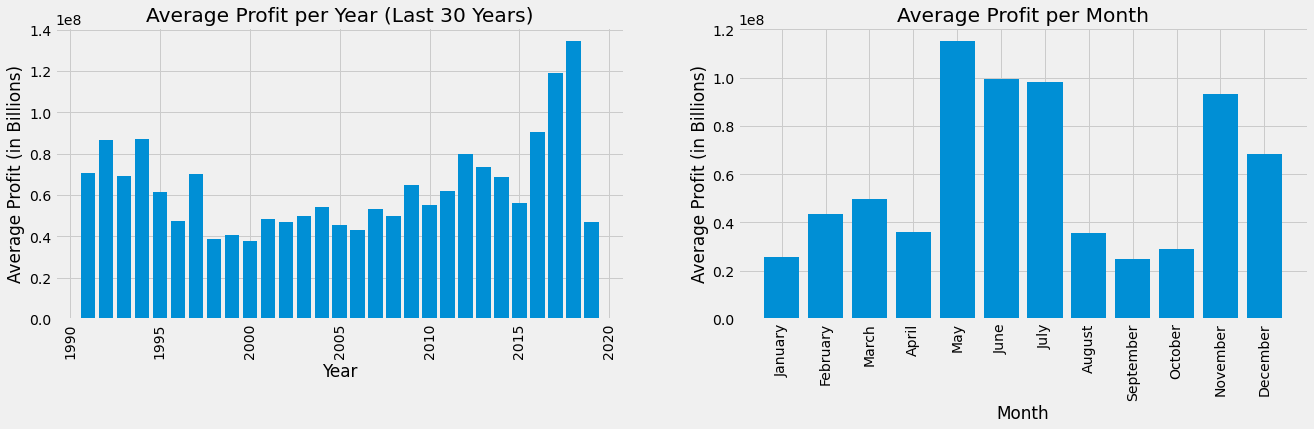

In [124]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize= (20,5))

#Average Profit by Year - Last 30 years excluding 2020

profit = budgets.sort_values('profit', ascending = False)

y1 = list(budgets.groupby('year')['profit'].mean().values[-30:-1])
x1 = list(budgets.groupby('year')['profit'].mean().index[-30:-1])

ax1.bar(x1,y1)


ax1.tick_params(axis='x', labelrotation = 90)

ax1.set_title('Average Profit per Year (Last 30 Years)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Profit (in Billions)')


#Average profit by Month

y2 = budgets.groupby(['month_num','month'])['profit'].mean().values
x2 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

ax2.bar(x2,y2)

ax2.tick_params(axis='x', labelrotation = 90)

ax2.set_title('Average Profit per Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Profit (in Billions)')

The below scatterplots show the positive correlation bewtween Budget vs Profit and Budget vs revenu

Text(0, 0.5, 'Worldwide Revenue')

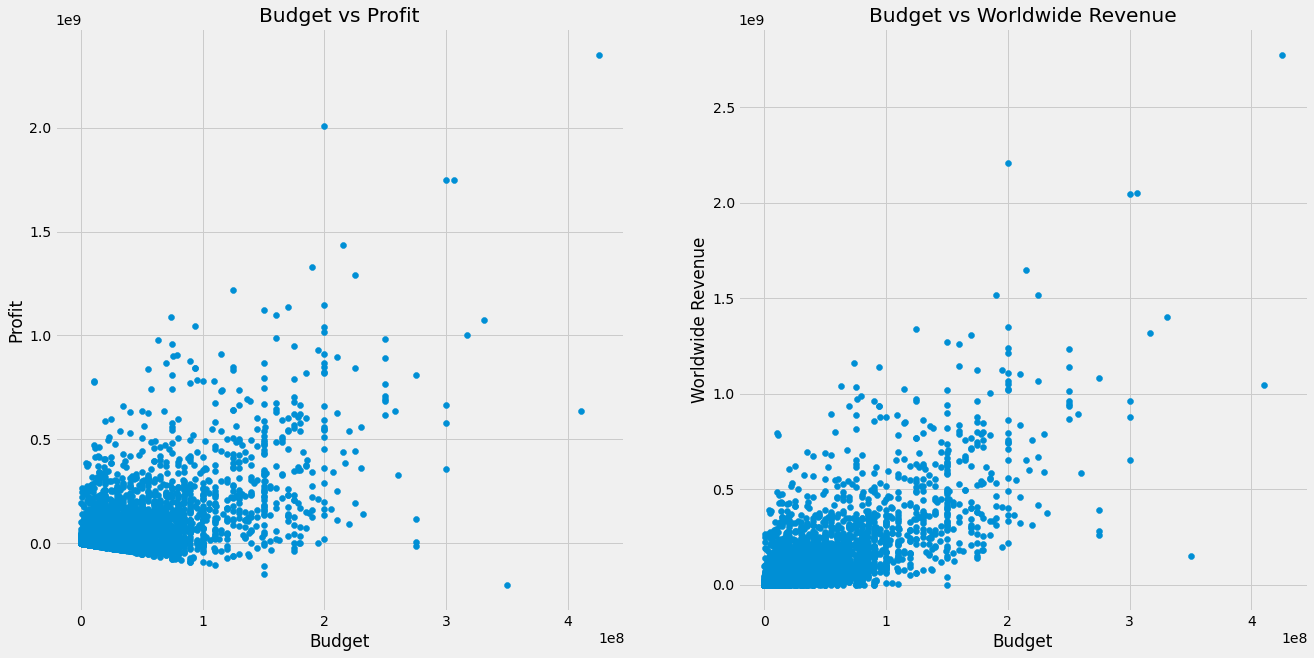

In [125]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize= (20,10))

#Budget vs Profit

y1 = budgets['profit']
x1 = budgets['production_budget']

ax1.scatter(x1,y1)

ax1.set_title('Budget vs Profit')
ax1.set_xlabel('Budget')
ax1.set_ylabel('Profit')

#Budget vs Revenue

y2 = budgets['worldwide_gross']
x2 = budgets['production_budget']


ax2.scatter(x2,y2)

ax2.set_title('Budget vs Worldwide Revenue')
ax2.set_xlabel('Budget')
ax2.set_ylabel('Worldwide Revenue')

This shows the most profitable movies over the last 10 years.

Text(0.5, 0, 'Movie Title')

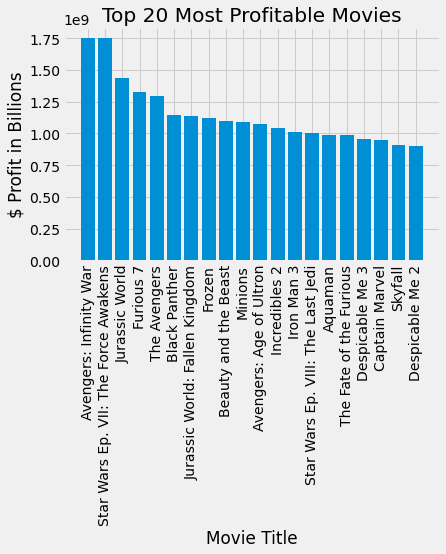

In [126]:
# Most profitable movies in lat 10 years
fig1, ax1 = plt.subplots()

profit = budgets.sort_values('profit', ascending = False)
profit_last_10 = profit[profit['year'] > 2011]

x1 = profit_last_10['movie'][:20]
y1 = profit_last_10['profit'][:20]

ax1.bar(x1,y1)

ax1.tick_params(axis='x', labelrotation = 90)

ax1.set_title('Top 20 Most Profitable Movies')
ax1.set_ylabel('$ Profit in Billions')
ax1.set_xlabel('Movie Title')

## Studios

In [127]:
#Filtering the studios by the ones that made more than 100 titles / moives
main_st_df= gross_df[gross_df["studio"].map(gross_df['studio'].value_counts()) > 100]

The below chart shows the average total gross revenue by studio.

<BarContainer object of 10 artists>

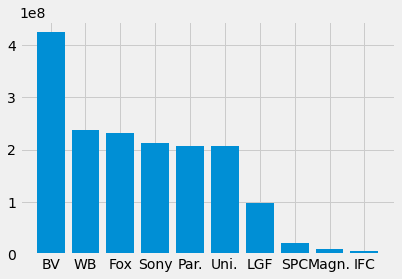

In [128]:
#Barchart for the mean total gross of the studios that made more than 100 titles
fig, ax =plt.subplots()

x= main_st_df.groupby('studio')['Total Gross Revenue'].mean().sort_values(ascending=False)[:10].index
y= main_st_df.groupby('studio')['Total Gross Revenue'].mean().sort_values(ascending=False)[:10].values

ax.bar(x,y)

The below chart shows the top 10 grossing films by total gross revenue

In [129]:
# Top 10 movies by Total Gross Revenue
top_gross_dom_df= gross_df.sort_values('Total Gross Revenue', ascending=False)
top_gross_dom_df[:10]

,title,studio,domestic_gross,foreign_gross,year,Total Gross Revenue
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


## IMDB

Top 10 Genres (not by region)

In [130]:
list_of_genres = final_merge['genres'].value_counts()[:10]
#all genres appearing in original title movies with a total number of votes greater than 5000
all_genres = final_merge[(final_merge['genres'].isin(list_of_genres.index)) &\
                            (final_merge['is_original_title'] == 1)&\
                           (final_merge['numvotes'] >= 5000)]
#total genres have appeared in 
all_genres = all_genres['genres'].value_counts()
#filtering genres that appear more than 100 times
all_genres_greater_2 = all_genres.values >= 100
#filtered genres list vs greater than 100 list
the_genres_name = all_genres[all_genres_greater_2]

x = final_merge[(final_merge['genres'].isin(the_genres_name.index)) & (final_merge['is_original_title'] == 1)]
x.drop(['region'], 1, inplace = True)
top_10_genres = x.groupby('genres')['averagerating'].mean().sort_values(ascending = False)
pd.DataFrame(top_10_genres).reset_index()

,averagerating
genres,
Documentary,7.189691
Drama,6.406563
"Drama,Romance",6.272612
"Comedy,Drama",6.256613
"Comedy,Drama,Romance",6.126215
"Drama,Thriller",6.004457
"Adventure,Animation,Comedy",5.981481
"Comedy,Romance",5.745582
Comedy,5.593292


Top 10 Directors (not by region)

In [131]:
#all directors appearing in original title movies with a total number of votes greater than 5000
all_directors = final_merge[(final_merge['category'] == 'director') &\
                            (final_merge['is_original_title'] == 1)&\
                           (final_merge['numvotes'] >= 5000)]
#total movies directors have appeared in 
all_directors_name = all_directors['primary_name'].value_counts()
#filtering director names that appear more than 3 times
all_directors_name_greater_2 = all_directors_name.values >= 3
#filtered names list vs geart than 3 list
the_directors_name = all_directors_name[all_directors_name_greater_2]


x = final_merge[(final_merge['primary_name'].isin(the_directors_name.index)) & (final_merge['is_original_title'] == 1)]
x.drop(['region'], 1, inplace = True)
y = x.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False)

top_10_directors = y[:10]
pd.DataFrame(top_10_directors).reset_index()

,averagerating
primary_name,
Anthony Russo,8.225000
Joe Russo,8.225000
Christopher Nolan,8.016667
Nuri Bilge Ceylan,7.950000
Quentin Tarantino,7.912500
S.S. Rajamouli,7.900000
Alejandro G. Iñárritu,7.875000
Toshiyuki Kubooka,7.833333
Denis Villeneuve,7.800000


Top 10 writers

In [132]:
#all writers appearing in original title movies with a total number of votes greater than 5000
all_writers = final_merge[(final_merge['category'] == 'actor') &\
                            (final_merge['is_original_title'] == 1)&\
                           (final_merge['numvotes'] >= 5000)]
#total movies writers have appeared in 
all_writers_name = all_writers['primary_name'].value_counts()
#filtering writers names that appear more than 3 times
all_writers_name_greater_2 = all_writers_name.values >= 3
#filtered names list vs geart than 3 list
the_writers_name = all_writers_name[all_writers_name_greater_2]

x = final_merge[(final_merge['primary_name'].isin(the_writers_name.index)) & (final_merge['is_original_title'] == 1)]
x.drop(['region'], 1, inplace = True)
y = x.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False)

top_10_writers = y[:10]
pd.DataFrame(top_10_writers).reset_index()

,averagerating
primary_name,
Vijay Deverakonda,7.940000
Kevin T. Collins,7.833333
Vicky Kaushal,7.685714
Craig Ferguson,7.600000
Jin Zhang,7.600000
Çetin Tekindor,7.575000
Robert Downey Jr.,7.530769
Ian McKellen,7.500000
Ryô Horikawa,7.500000


Top 10 Actors

In [133]:

#all actors appearing in original title movies with a total number of votes greater than 5000
all_actors = final_merge[(final_merge['category'] == 'actor') &\
                            (final_merge['is_original_title'] == 1)&\
                           (final_merge['numvotes'] >= 5000)]
#total movies actors have appeared in 
all_actors_name = all_actors['primary_name'].value_counts()
#filtering actors names that appear more than 3 times
all_actors_name_greater_2 = all_actors_name.values >= 3
#filtered names list vs geart than 3 list
the_actors_name = all_actors_name[all_actors_name_greater_2]

x = final_merge[(final_merge['primary_name'].isin(the_actors_name.index)) & (final_merge['is_original_title'] == 1)]
x.drop(['region'], 1, inplace = True)
y = x.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False)

top_10_actors = y[:10]
pd.DataFrame(top_10_actors).reset_index()

,averagerating
primary_name,
Vijay Deverakonda,7.940000
Kevin T. Collins,7.833333
Vicky Kaushal,7.685714
Craig Ferguson,7.600000
Jin Zhang,7.600000
Çetin Tekindor,7.575000
Robert Downey Jr.,7.530769
Ian McKellen,7.500000
Ryô Horikawa,7.500000


Top 10 Actresses

In [136]:

#all actresses appearing in original title movies with a total number of votes greater than 5000
all_actress = final_merge[(final_merge['category'] == 'actress') &\
                            (final_merge['is_original_title'] == 1)&\
                           (final_merge['numvotes'] >= 5000)]
#total movies actresses have appeared in 
all_actress_name = all_actress['primary_name'].value_counts()
#filtering actresses names that appear more than 3 times
all_actress_name_greater_2 = all_actress_name.values >= 3
#filtered names list vs geart than 3 list
the_actress_name = all_actress_name[all_actress_name_greater_2]


x = final_merge[(final_merge['primary_name'].isin(the_actress_name.index)) & (final_merge['is_original_title'] == 1)]
x.drop(['region'], 1, inplace = True)
y = x.groupby('primary_name')['averagerating'].mean().sort_values(ascending = False)

top_10_actress = y[:10]
pd.DataFrame(top_10_actress).reset_index()

,primary_name,averagerating
0,Carrie Keranen,7.833333
1,Farah Zeynep Abdullah,7.640000
2,Aoi Yûki,7.500000
3,Masako Nozawa,7.500000
4,Carey Mulligan,7.272727
5,Mackenzie Foy,7.214286
6,Bhumi Pednekar,7.160000
7,Seher Devrim Yakut,7.150000
8,Emmy Rossum,7.133333
9,Sally Hawkins,7.100000


Run-time vs average rating

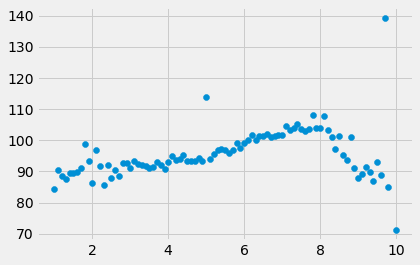

In [135]:
avg_rating = final_merge.groupby('averagerating').mean()
avg_rating.drop(['ordering_x', 'start_year', 'birth_year'], 1, inplace=True)
avg_rating.reset_index(inplace=True)
plt.scatter(avg_rating['averagerating'], avg_rating['runtime_minutes']);

# Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

This analysis leads to three recommendations for creating a movie.

**1. Engage with the top 3 studios (Buena Vists, Warner Bros, and Fox) who generate the most revenue per movie.** As 

# Next Steps